In [8]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
# loading raw dataset
df = pd.read_csv("../data/cleaned/cleaned_telco_customer_churn.csv")
df.head()

,CustomerID,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,Churn Reason,Calculated Total,Revenue Difference
0,3668-QPYBK,Los Angeles,Male,No,No,No,2,Yes,No,DSL,...,Yes,Mailed check,53.85,108.15,Yes,1,86,Competitor made better offer,107.7,0.45
1,9237-HQITU,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,...,Yes,Electronic check,70.70,151.65,Yes,1,67,Moved,141.4,10.25
2,9305-CDSKC,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,Electronic check,99.65,820.50,Yes,1,86,Moved,797.2,23.30
3,7892-POOKP,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Electronic check,104.80,3046.05,Yes,1,84,Moved,2934.4,111.65
4,0280-XJGEX,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,Competitor had better devices,5081.3,45.00


In [10]:
# Dataset overview
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

print(df.shape)
print(df.info())
print(df.describe())

customer_status_counts = df["Churn Value"].value_counts()
print("\nCustomer status count", customer_status_counts)
print(df["Churn Value"].value_counts(normalize=True))


DATASET OVERVIEW
(7032, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          7032 non-null   object 
 1   City                7032 non-null   object 
 2   Gender              7032 non-null   object 
 3   Senior Citizen      7032 non-null   object 
 4   Partner             7032 non-null   object 
 5   Dependents          7032 non-null   object 
 6   Tenure Months       7032 non-null   int64  
 7   Phone Service       7032 non-null   object 
 8   Multiple Lines      7032 non-null   object 
 9   Internet Service    7032 non-null   object 
 10  Online Security     7032 non-null   object 
 11  Online Backup       7032 non-null   object 
 12  Device Protection   7032 non-null   object 
 13  Tech Support        7032 non-null   object 
 14  Streaming TV        7032 non-null   object 
 15  Streaming Movies    7032 no

Total customer count is 6920, percentage of churned is 26.58% and active customer stands at 73.42%.
Showing major imbalance, as active customer is 3 times the churned

TARGET ANALYSIS (CUSTOMER CHURN)


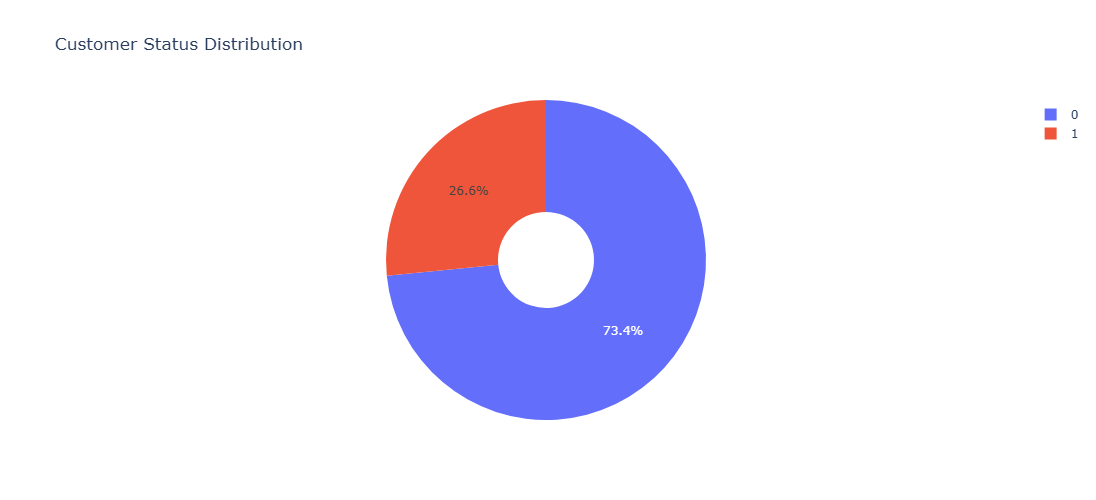

In [11]:
print("=" * 60)
print("TARGET ANALYSIS (CUSTOMER CHURN)")
print("=" * 60)

# Churn Distribution
fig = px.pie(
    df,
    names="Churn Value",       
    title="Customer Status Distribution",
    width=500,
    height=500,                       
    hole=0.3
)
fig.show()

In [19]:
# Top 10 reasons why customers churn
churn_reason = df[df["Churn Value"]==1]["Churn Reason"].value_counts()
churn_reason.head(10)

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Name: count, dtype: int64

DEMOGRAPHIC ANALYSIS


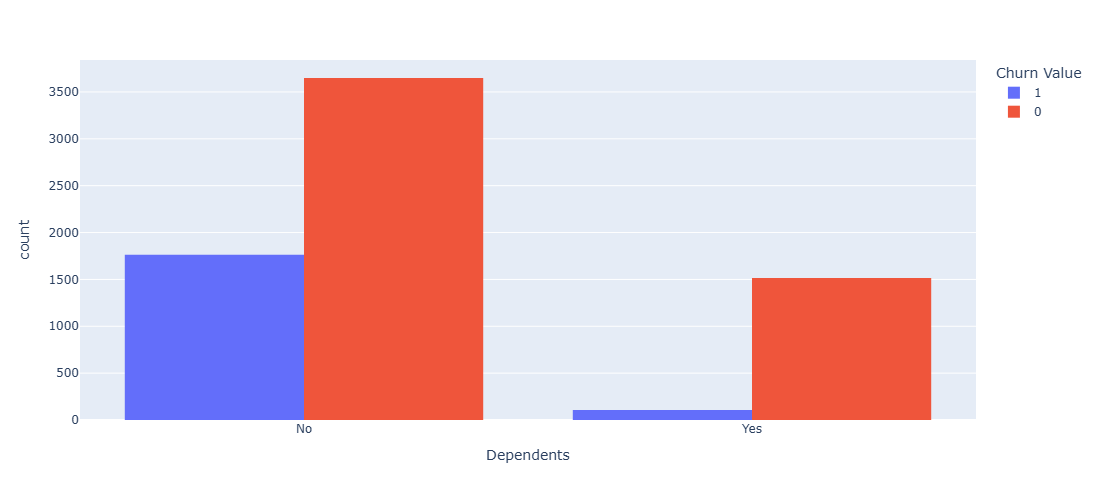

In [26]:
print("=" * 60)
print("DEMOGRAPHIC ANALYSIS")
print("=" * 60)

# dependents vs churn
px.histogram(
    df, 
    x="Dependents", 
    color="Churn Value", 
    barmode="group",
    width=800,
    height=500
)

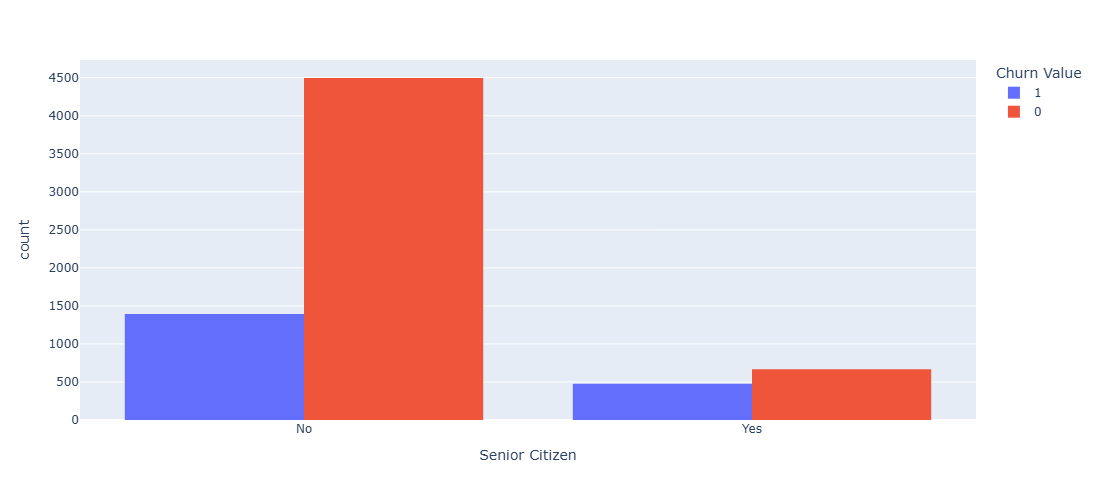

In [27]:
# snr citizen vs vhurn
px.histogram(
    df, 
    x="Senior Citizen", 
    color="Churn Value", 
    barmode="group",
    width=800,
    height=500
)

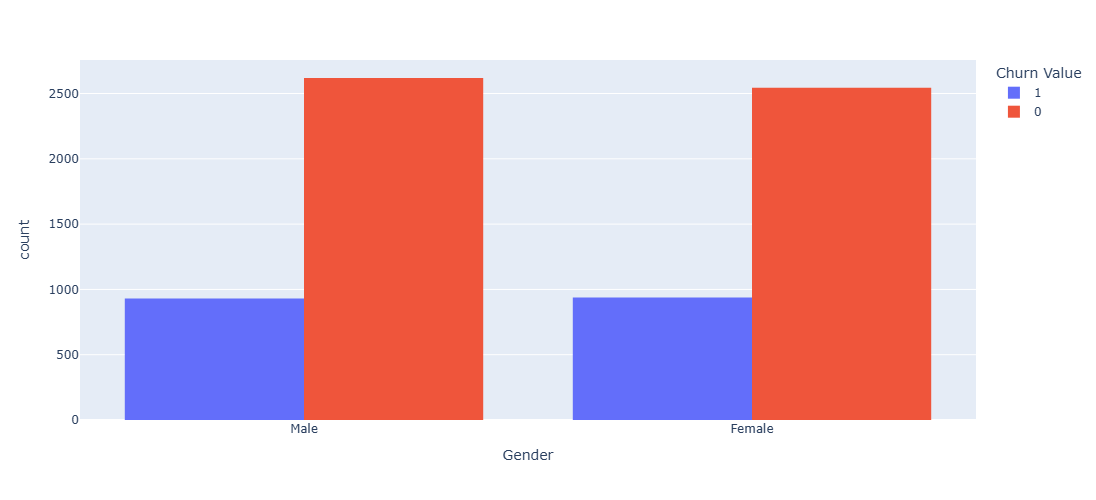

In [28]:
# gender vs Churn
px.histogram(
    df, 
    x="Gender", 
    color="Churn Value", 
    barmode="group",
    width=800,
    height=500
)

FINANCIAL ANALYSIS


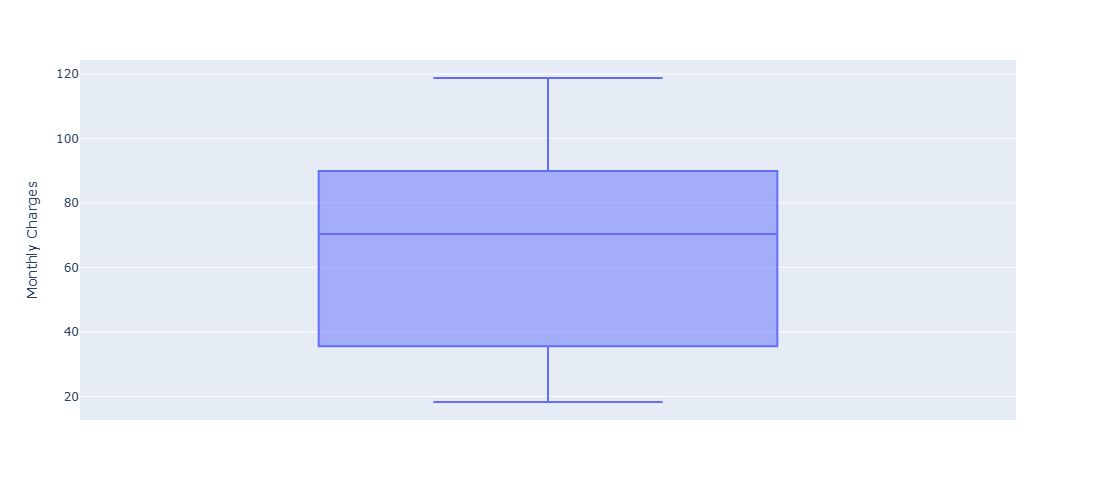

In [33]:
print("=" * 60)
print("FINANCIAL ANALYSIS")
print("=" * 60)

# Monthly Charge Distribution
px.box(
    df,
    y="Monthly Charges",
    width=500,
    height=500
)

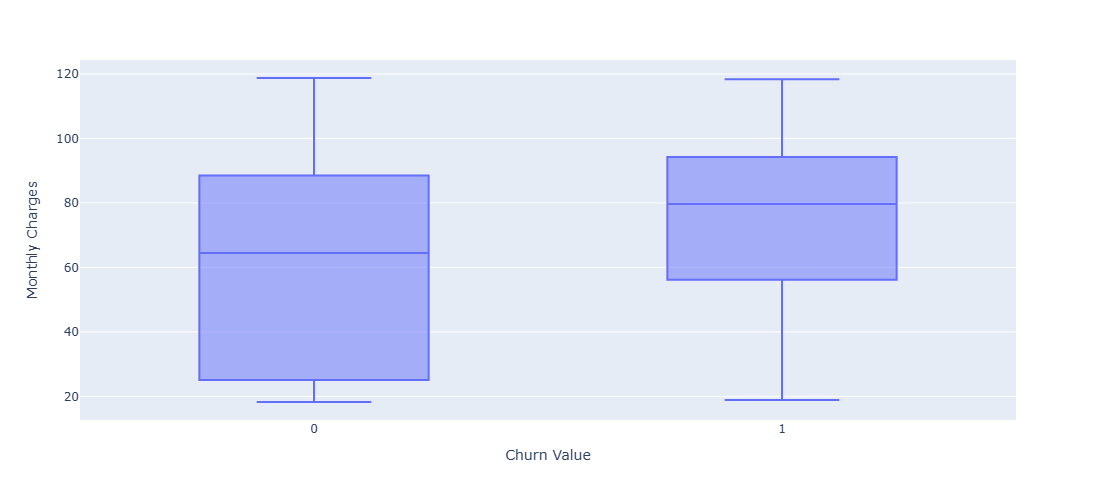

In [34]:
# Monthly Charge vs Churn
px.box(
    df, 
    x="Churn Value", 
    y="Monthly Charges",
    width=800,
    height=500
)

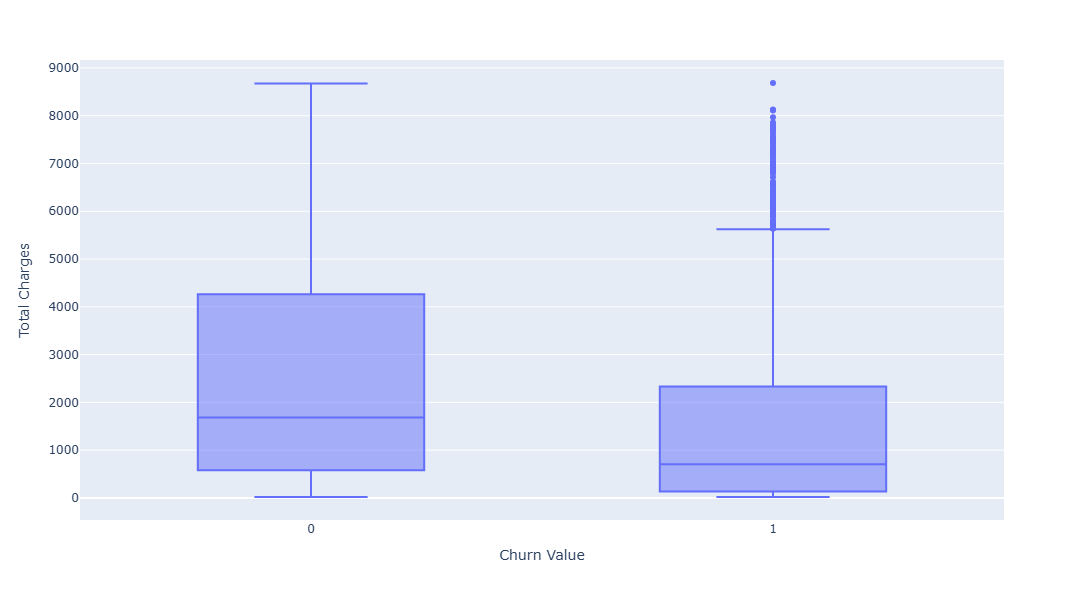

In [36]:
# Total Revenue vs Churn
px.box(
    df, 
    x="Churn Value", 
    y="Total Charges",
    width=600,
    height=600
)

In [41]:
# Revenue at Risk
risk_revenue = df[df["Churn Value"]==1]["Total Charges"].sum()
print(f"Total reveue at risk : ${risk_revenue:,.2f}")

Total reveue at risk : $2,862,926.90


CONTRACT & PAYMENT METHOD


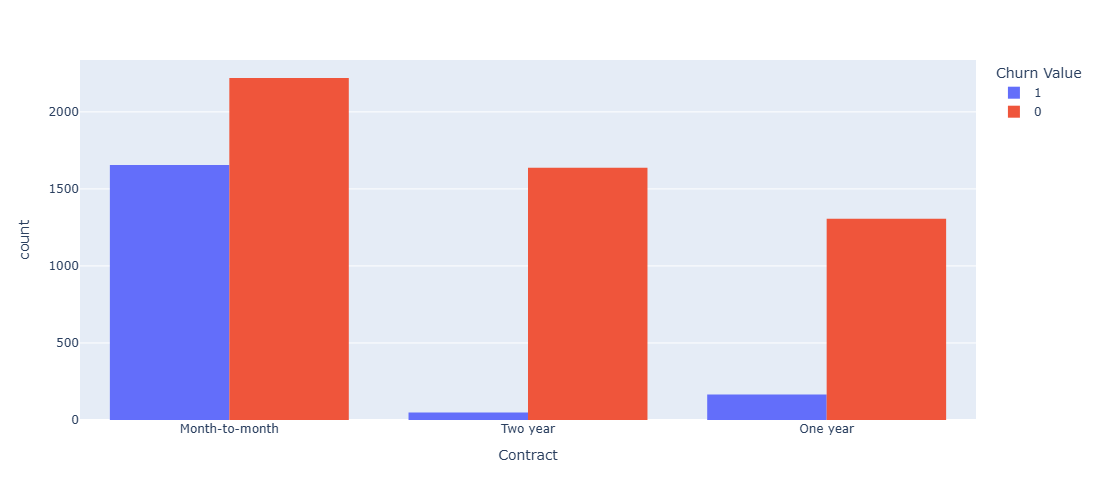

In [42]:
print("=" * 60)
print("CONTRACT & PAYMENT METHOD")
print("=" * 60)

# contract type
px.histogram(
    df,
    x="Contract", 
    color="Churn Value", 
    barmode="group",
    width=800,
    height=500
)

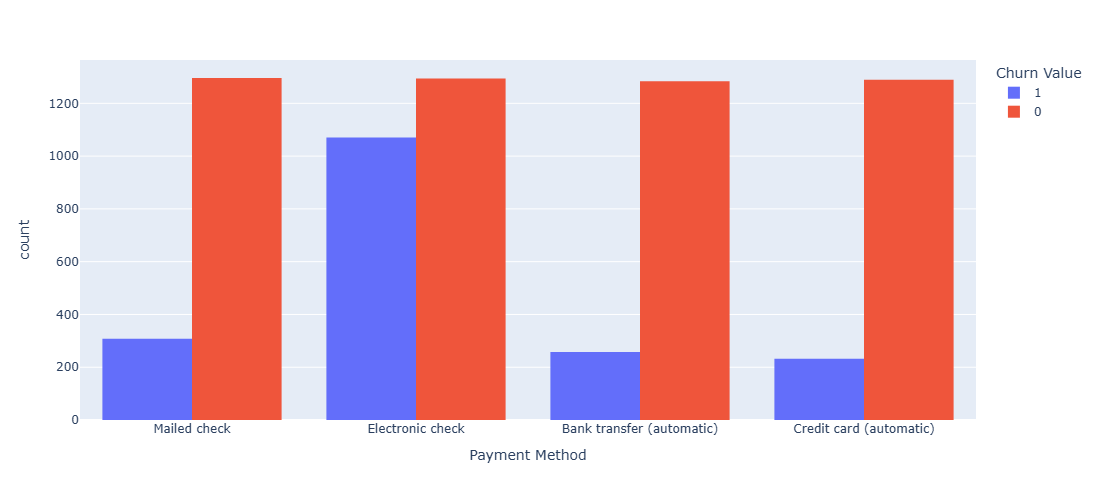

In [43]:
# Payment Method
px.histogram(
    df, 
    x="Payment Method", 
    color="Churn Value", 
    barmode="group",
    width=800,
    height=500
)

SERVICE USAGE PATTERN


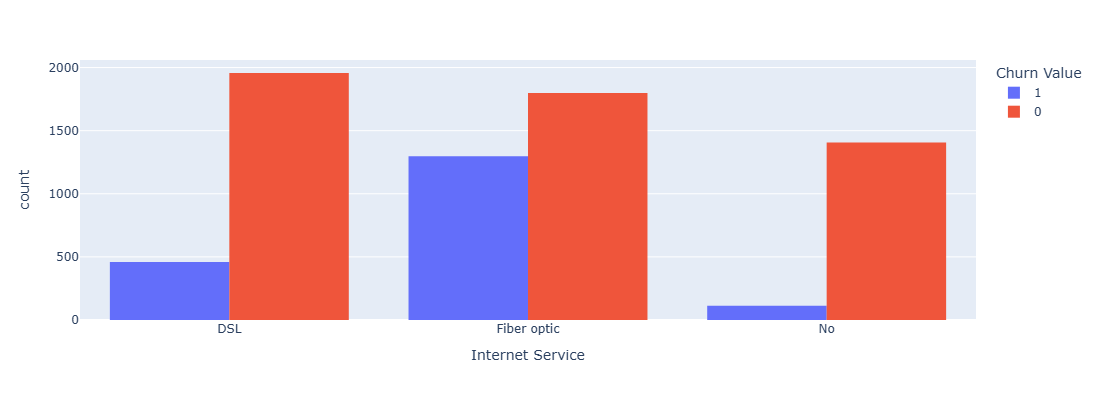

In [44]:
print("=" * 60)
print("SERVICE USAGE PATTERN")
print("=" * 60)

# Internet Type vs Churn
px.histogram(
    df, 
    x="Internet Service", 
    color="Churn Value", 
    barmode="group",
    width=800,
    height=400
)

SERVICE USAGE PATTERN


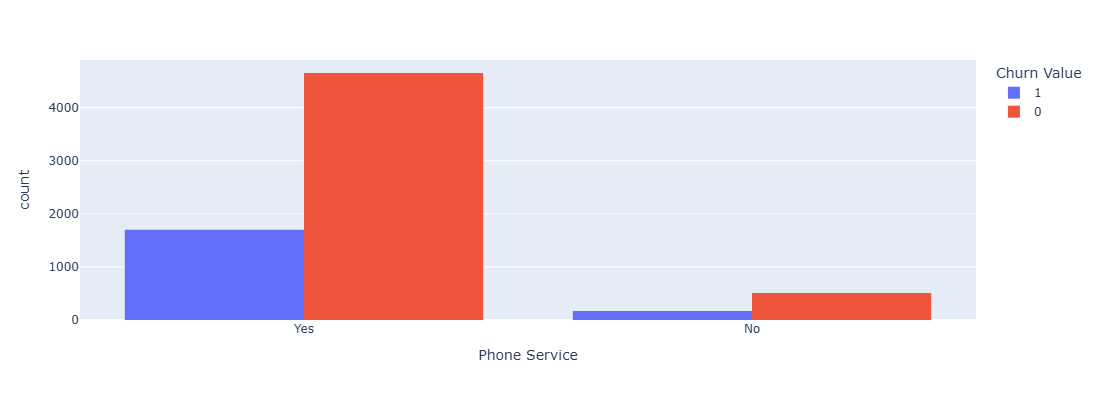

In [45]:
print("SERVICE USAGE PATTERN")
print("=" * 60)

# Phone service vs Churn
px.histogram(
    df, 
    x="Phone Service",
    color="Churn Value", 
    barmode="group",
    width=800,
    height=400
)

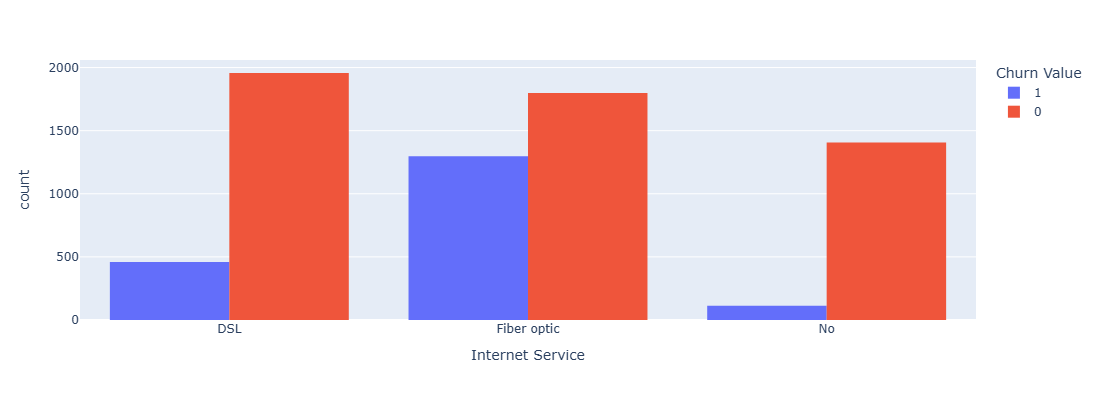

In [46]:
# Internet services vs Churn
px.histogram(
    df, 
    x=,
    color="Churn Value", 
    barmode="group",
    width=800,
    height=400
)

In [47]:
print("=" * 60)
print("CORRELATION AND NUMERIC ANALYSIS")
print("=" * 60)

numeric_cols = df.select_dtypes(include="number")
churn_corr = numeric_cols.corr()["Churn Value"].sort_values(ascending=False)
churn_corr= churn_corr.to_frame()

churn_corr

CORRELATION AND NUMERIC ANALYSIS


,Churn Value
Churn Value,1.000000
Churn Score,0.664970
Monthly Charges,0.192858
Revenue Difference,-0.141167
Total Charges,-0.199484
Calculated Total,-0.199675
Tenure Months,-0.354049
